In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
# from matplotlib.font_manager import FontProperties

%matplotlib inline
plt.style.use('ggplot')

# font_name = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# print(font_name)

plt.rcParams['font.family']= 'DFKai-SB'  #顯示中文
plt.rcParams['axes.unicode_minus'] = False  #顯示負號

pd.set_option('display.max_columns', 50)  #最多顯示50個欄位資訊

In [2]:
df = pd.read_csv('Taichung_106.csv', encoding = 'utf8')
df.head(5)

,鄉鎮市區,交易標的,土地區段位置/建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元/平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,南區,房地(土地+建物)+車位,臺中市南區工學一街179巷1~30號,13.56,住,NaN,NaN,1050928,土地1建物1車位1,三層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,870930.0,92.56,3,1,1,有,有,4850000,52398.0,坡道機械,0.00,0,NaN,RPVNMLLJJILFFAB27CA
1,西區,房地(土地+建物),臺中市西區三民路一段39巷3弄1~30號,4.38,住,NaN,NaN,1051013,土地3建物1車位0,六層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,830504.0,43.40,2,0,2,有,有,1500000,34562.0,NaN,0.00,0,NaN,RPXNMLMJJILFFAB57CA
2,南區,房地(土地+建物)+車位,臺中市南區工學北路331~360號,25.77,住,NaN,NaN,1051001,土地1建物1車位2,十一層,二十六層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,1031029.0,228.28,4,2,2,有,有,15680000,68688.0,坡道平面,45.82,0,NaN,RPSNMLNJJILFFAB17CA
3,南區,車位,臺中市南區建國南路一段151~180號,0.00,NaN,NaN,NaN,1051016,土地0建物0車位1,地下層,十二層,其他,見其他登記事項,鋼筋混凝土造,801101.0,33.97,0,0,0,有,有,1000000,NaN,坡道平面,0.00,0,NaN,RPUNMLNJJILFFAB37CA
4,南區,房地(土地+建物),臺中市南區仁義街71巷1~30號,93.50,住,NaN,NaN,1050906,土地1建物1車位0,全,五層,透天厝,見其他登記事項,鋼筋混凝土造,1001116.0,239.04,12,1,12,有,無,13500000,56476.0,NaN,0.00,0,親友、員工或其他特殊關係間之交易。;畸零地或有合併使用之交易。;親友、員工或其他特殊關係間之...,RPWOMLNJJILFFAB67CA


# 預處理

In [3]:
df.groupby('交易標的').mean()

,土地移轉總面積平方公尺,交易年月日,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,總價元,單價元/平方公尺,車位移轉總面積平方公尺,車位總價元
交易標的,,,,,,,,,,,
土地,804.769051,1.061596e+06,780920.000000,0.031897,0.000000,0.000000,0.000000,1.816495e+07,41527.043610,0.000000,0.000000
建物,0.000000,1.054311e+06,935393.620438,511.404784,2.575540,1.079137,2.122302,1.366816e+07,31616.431373,16.656619,615435.251799
房地(土地+建物),90.341317,1.061475e+06,844233.499107,153.944370,3.373929,1.751570,2.593630,9.670985e+06,58135.919854,0.000000,0.000000
房地(土地+建物)+車位,26.315974,1.055716e+06,992615.903548,188.817948,2.910221,1.821204,1.894611,1.268422e+07,65730.882209,26.396053,796391.161298
車位,1.854701,1.062000e+06,843020.270386,32.801175,0.000000,0.000000,0.000000,9.677112e+05,NaN,22.497589,890120.003040


In [303]:
# # 拿掉土地和車位
# df = df[(df['交易標的'] != '土地') & (df['交易標的'] != '車位')].reset_index(drop = True)

In [304]:
# # 以萬為單位
# df.loc[:, '總價元'] = df.loc[:, '總價元'] / 10000

### 對交易標的做one-hot encoding

In [4]:
df_target = pd.get_dummies(df['交易標的'])
df_target.head()

,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,1,0,0


### 補值：處理建築完成年月為nan的row，補0

In [5]:
df[(df['交易標的'] != '土地') & (df['交易標的'] != '車位') & (df['建築完成年月'].isnull().values == True)]

,鄉鎮市區,交易標的,土地區段位置/建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元/平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
137,太平區,房地(土地+建物),臺中市太平區太平五街151~180號,72.77,住,NaN,NaN,1051003,土地1建物1車位0,全,二層,透天厝,見其他登記事項,加強磚造,NaN,107.86,4,3,4,有,無,7500000,69535.0,NaN,0.0,0,NaN,RPVNMLKMJILFFHL56CA
199,北屯區,房地(土地+建物)+車位,臺中市北屯區太原路三段101巷1~30號,1.99,住,NaN,NaN,1051006,土地1建物1車位1,NaN,NaN,住宅大樓(11層含以上有電梯),NaN,NaN,NaN,28.24,2,1,1,有,有,1300000,46034.0,坡道平面,0.0,0,NaN,RPVNMLNLJILFFBB77CA
348,北區,房地(土地+建物),臺中市北區梅亭街514巷1~30號,185.00,住,NaN,NaN,1051008,土地1建物1車位0,全,一層,透天厝,住家用,鋼筋混凝土加強磚造,NaN,64.15,2,2,1,有,無,23500000,366329.0,NaN,0.0,0,NaN,RPRQMLOKJILFFBB67CA
506,北區,房地(土地+建物),臺中市北區三民路三段201巷1~30號,71.00,住,NaN,NaN,1051012,土地1建物1車位0,一層，二層，騎樓,二層,店面(店鋪),住家用,鋼筋混凝土加強磚造,NaN,118.76,0,0,0,無,無,15000000,126305.0,NaN,0.0,0,含增建或未登記建物。;含增建或未登記建物。,RPPNMLOKJILFFBB17CA
965,烏日區,房地(土地+建物),臺中市烏日區溪南路三段55巷13弄1~30號,101.58,NaN,NaN,NaN,1051004,土地2建物1車位0,全,NaN,透天厝,NaN,NaN,NaN,180.73,4,2,3,有,無,11800000,65291.0,NaN,0.0,0,含增建,RPRNMLSKJILFFGL66CA
1136,東區,房地(土地+建物),臺中市東區復興路四段138巷1~30號,39.00,商,NaN,NaN,1051028,土地1建物1車位0,一層，二層，騎樓,二層,店面(店鋪),商業用,見其他登記事項,NaN,76.68,2,0,1,有,無,5305500,69190.0,NaN,0.0,0,1.土增稅由買方支付,RPQNMLOKJILFFAB17CA
1147,東區,房地(土地+建物),臺中市東區復興路四段271~300號,70.00,住,NaN,NaN,1051025,土地2建物1車位0,全,三層,透天厝,住家用,見其他登記事項,NaN,153.20,4,2,3,有,無,8300000,54178.0,NaN,0.0,0,賣方不負擔增值稅,RPVOMLOKJILFFAB77CA
1161,北區,房地(土地+建物),臺中市北區錦中街50巷1弄1~30號,100.00,住,NaN,NaN,1051010,土地1建物1車位0,全,二層,透天厝,住家用,磚造,NaN,98.53,8,0,8,有,無,12300000,124835.0,NaN,0.0,0,NaN,RPWQMLSKJILFFBB58CA
1424,西區,房地(土地+建物),臺中市西區五權西五街88巷31~60號,47.00,住,NaN,NaN,1051001,土地1建物1車位0,全,二層,透天厝,住家用,見其他登記事項,NaN,54.00,3,2,1,有,無,4580000,84815.0,NaN,0.0,0,含增建或未登記建物。;含增建或未登記建物。,RPTNMLMLJILFFAB37CA
1606,霧峰區,房地(土地+建物),臺中市霧峰區德維街36巷1~30號,83.00,住,NaN,NaN,1051022,土地1建物1車位0,全,二層,透天厝,住家用,加強磚造,NaN,92.73,4,2,3,有,無,5800000,62547.0,NaN,0.0,0,NaN,RPQNMLNLJILFFGL78CA


In [6]:
df = df.fillna(value = {'建築完成年月': 0})

In [7]:
df[df['建築完成年月'].isnull().values == True].shape

(0, 28)

In [8]:
df[df['交易年月日'].isnull().values == True].shape

(0, 28)

# 產生交易年/屋齡之特徵

In [9]:
for i  in range(len(df)):
    df.loc[i, '交易年'] = round(df.loc[i, '交易年月日'] / 10000)

In [10]:
from datetime import datetime
now = datetime.now()

In [11]:
for i in range(len(df)):
    df.loc[i, '屋齡'] = (now.year - 1911) - round(df.loc[i, '建築完成年月'] / 10000)

In [12]:
df.head(1)

,鄉鎮市區,交易標的,土地區段位置/建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元/平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號,交易年,屋齡
0,南區,房地(土地+建物)+車位,臺中市南區工學一街179巷1~30號,13.56,住,NaN,NaN,1050928,土地1建物1車位1,三層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,870930.0,92.56,3,1,1,有,有,4850000,52398.0,坡道機械,0.0,0,NaN,RPVNMLLJJILFFAB27CA,105.0,20.0


In [13]:
df2 = df[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價元/平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','交易年','總價元']]
df2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元
鄉鎮市區,,,,,,,,,,,
中區,30.478024,103.738503,45064.816667,1.747006,0.916168,1.431138,1.794686,46833.832335,41.510479,106.148204,6.515454e+06
北區,32.875711,131.346497,62645.105142,2.608553,1.384663,1.875411,9.436698,315726.973684,28.483347,105.858758,8.982820e+06
北屯區,152.469753,144.872683,62821.053636,2.646002,1.594571,1.809872,13.997712,383998.124383,26.695755,105.961599,1.457819e+07
南區,40.812173,134.743158,59247.808780,2.688889,1.603977,1.835789,14.584061,428150.643275,23.235789,105.774269,9.114153e+06
南屯區,93.027201,177.883129,79752.328832,2.741270,1.625839,1.930673,21.529193,706424.481679,22.530535,105.436264,2.022871e+07
后里區,466.479868,101.674271,35435.912214,1.860771,1.021637,1.397930,2.861825,77714.016933,59.871119,105.747883,9.607159e+06
和平區,4730.607629,1.188660,1379.876289,0.051546,0.020619,0.020619,0.000000,0.000000,106.041237,106.072165,2.222667e+06
外埔區,684.840966,96.193119,25314.464358,2.036217,1.080483,1.509054,0.091650,0.000000,58.468813,105.945674,7.604079e+06
大安區,820.370438,55.305438,16458.409594,1.291971,0.664234,0.890511,0.000000,0.003650,77.627737,106.014599,4.892644e+06


### 把交易標的加進去

In [14]:
df2 = pd.merge(df2, df_target, left_index = True, right_index = True)
df2.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位
0,南區,13.56,92.56,52398.0,3,1,1,0.00,0,20.0,105.0,4850000,0,0,0,1,0
1,西區,4.38,43.40,34562.0,2,0,2,0.00,0,24.0,105.0,1500000,0,0,1,0,0
2,南區,25.77,228.28,68688.0,4,2,2,45.82,0,4.0,105.0,15680000,0,0,0,1,0
3,南區,0.00,33.97,NaN,0,0,0,0.00,0,27.0,105.0,1000000,0,0,0,0,1
4,南區,93.50,239.04,56476.0,12,1,12,0.00,0,7.0,105.0,13500000,0,0,1,0,0


### 對鄉鎮市區做one-hot encoding

In [15]:
df_region = pd.get_dummies(df['鄉鎮市區'])
df_region.head()

,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_ml = pd.merge(df2, df_region, left_index = True, right_index = True)
df_ml.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區
0,南區,13.56,92.56,52398.0,3,1,1,0.00,0,20.0,105.0,4850000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,西區,4.38,43.40,34562.0,2,0,2,0.00,0,24.0,105.0,1500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,南區,25.77,228.28,68688.0,4,2,2,45.82,0,4.0,105.0,15680000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,南區,0.00,33.97,NaN,0,0,0,0.00,0,27.0,105.0,1000000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,南區,93.50,239.04,56476.0,12,1,12,0.00,0,7.0,105.0,13500000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df_ml.shape

(75830, 46)

### 把沒有單價與總價的row去掉

In [18]:
# df_ml = df_ml[(df_ml[['總價元']] != 0).all(axis = 1)].reset_index(drop = True)
df_ml = df_ml[~((df_ml['總價元'] == 0) & (df_ml['單價元/平方公尺'] == 0) & (df_ml['車位總價元'] == 0))]
df_ml.head()
# df_ml[(df_ml['總價元'] == 0) & (df_ml['單價元/平方公尺'] == 0) & (df_ml['車位總價元'] == 0)].shape

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區
0,南區,13.56,92.56,52398.0,3,1,1,0.00,0,20.0,105.0,4850000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,西區,4.38,43.40,34562.0,2,0,2,0.00,0,24.0,105.0,1500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,南區,25.77,228.28,68688.0,4,2,2,45.82,0,4.0,105.0,15680000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,南區,0.00,33.97,NaN,0,0,0,0.00,0,27.0,105.0,1000000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,南區,93.50,239.04,56476.0,12,1,12,0.00,0,7.0,105.0,13500000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df_ml.shape

(75807, 46)

In [20]:
df_ml[(df_ml['總價元'] != 0) | (df_ml['單價元/平方公尺'] != 0) | (df_ml['車位總價元'] != 0)].shape

(75807, 46)

In [21]:
df_ml[df_ml['總價元'] == 0].shape

(0, 46)

In [22]:
df_ml[(df_ml['單價元/平方公尺'] == 0) & (df_ml['建物移轉總面積平方公尺'] != 0) & (df_ml['車位總價元'] == 0)]

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區
11136,北屯區,0.19,0.69,0.0,3,2,1,0.00,0,35.0,106.0,30000,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13516,西區,0.12,0.68,0.0,2,1,1,0.00,0,24.0,106.0,30000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
28758,北區,0.10,1.16,0.0,3,2,2,0.16,0,18.0,106.0,28800,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30868,東區,0.02,0.14,0.0,0,0,0,0.00,0,22.0,106.0,2000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
31266,北區,0.10,1.16,0.0,3,2,2,0.16,0,18.0,106.0,28800,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32564,北區,0.40,0.78,0.0,0,0,0,0.00,0,38.0,106.0,36500,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36957,南區,4.85,30.30,0.0,0,0,0,30.30,0,107.0,106.0,1680000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39329,中區,0.00,0.01,0.0,0,0,0,0.00,0,41.0,106.0,146,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39330,中區,0.00,0.01,0.0,0,0,0,0.00,0,41.0,106.0,146,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48600,西屯區,13.22,146.51,0.0,3,2,2,2171.00,0,10.0,106.0,9850000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
for i in df_ml[(df_ml['單價元/平方公尺'] == 0) & (df_ml['建物移轉總面積平方公尺'] != 0) & (df_ml['車位總價元'] == 0)].index.values:
    df_ml.loc[i, '單價元/平方公尺'] = df_ml.loc[i, '總價元'] / df_ml.loc[i, '建物移轉總面積平方公尺']

In [24]:
df_ml[(df_ml['單價元/平方公尺'] == 0) & (df_ml['建物移轉總面積平方公尺'] != 0) & (df_ml['車位總價元'] == 0)].shape

(0, 46)

In [25]:
df_ml.loc[9143, '單價元/平方公尺']

0.0

In [26]:
df_ml[df_ml['總價元'].isnull().values == True].shape

(0, 46)

In [27]:
for i in df_ml[(df_ml['單價元/平方公尺'].isnull().values == True) & (df_ml['車位總價元'] != 0)].index.values:
    df_ml.loc[i, '單價元/平方公尺'] = 0

In [28]:
df_ml[(df_ml['單價元/平方公尺'].isnull().values == True) & (df_ml['車位總價元'] != 0)].shape

(0, 46)

In [29]:
df_ml[(df_ml['單價元/平方公尺'].isnull().values == True)].shape

(351, 46)

In [30]:
for i in df_ml[(df_ml['單價元/平方公尺'].isnull().values == True)].index.values:
    df_ml.loc[i, '單價元/平方公尺'] = df_ml.loc[i, '總價元'] / (df_ml.loc[i, '土地移轉總面積平方公尺'] + df_ml.loc[i, '建物移轉總面積平方公尺'] + df_ml.loc[i, '車位移轉總面積平方公尺'])

In [31]:
df_ml[(df_ml['單價元/平方公尺'].isnull().values == True)].shape

(0, 46)

In [32]:
df_ml[df_ml['車位移轉總面積平方公尺'].isnull().values == True].shape

(0, 46)

In [33]:
df_ml[df_ml.isnull().values == True].shape

(0, 46)

In [34]:
df_ml = df_ml.drop(columns = ['鄉鎮市區'])

In [35]:
df_ml.head(5)

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區
0,13.56,92.56,52398.000000,3,1,1,0.00,0,20.0,105.0,4850000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.38,43.40,34562.000000,2,0,2,0.00,0,24.0,105.0,1500000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,25.77,228.28,68688.000000,4,2,2,45.82,0,4.0,105.0,15680000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.00,33.97,29437.739182,0,0,0,0.00,0,27.0,105.0,1000000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,93.50,239.04,56476.000000,12,1,12,0.00,0,7.0,105.0,13500000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df_ml[df_ml.isnull().values == True].shape

(0, 45)

In [37]:
df_ml.shape

(75807, 45)

# 使用Cross Validation來決定tree的高度

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [52]:
X = df_ml.drop(columns = ['總價元'])
y = df_ml[['總價元']]

[374847379969613.8, 365699099660852.6, 378166102674313.6, 382076182779211.2, 396147234659660.44, 350749025264224.9, 417607587078311.8, 414520440779244.94, 376659640292286.0, 374570583334978.94]


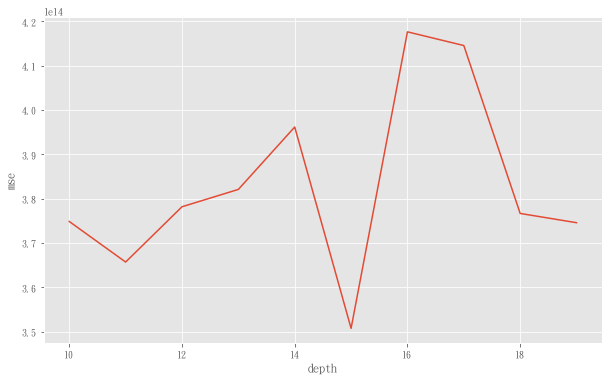

In [74]:
from sklearn.model_selection import cross_val_score

# dtr = DecisionTreeRegressor(max_depth = 5)
# mse = cross_val_score(dtr, X, y, cv = 10)
# print(type(mse), mse, mse.mean())
mse_scores = []
for d in range(10, 20):
    dtr = DecisionTreeRegressor(max_depth = d)
    mse = -cross_val_score(dtr, X, y, cv = 10, scoring = 'neg_mean_squared_error')
    mse_scores.append(mse.mean())

print(mse_scores)
plt.figure(figsize = (10, 6))
plt.plot([i for i in range(10, 20)], mse_scores)
plt.xlabel('depth')
plt.ylabel('mse')
plt.show()

In [75]:
print('smallest mse position:', mse_scores.index(min(mse_scores)) + 10)

smallest mse position: 15


# Decision Tree Regression

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [84]:
regr = DecisionTreeRegressor(max_depth = mse_scores.index(min(mse_scores)) + 10)
regr.fit(X_train, y_train)
print('score:', regr.score(X_test, y_test))

score: 0.718463530833006


In [85]:
test_predict = regr.predict(X_test)
dif = test_predict - y_test['總價元'].values
dif_sum = 0
for difs in dif:
    dif_sum += abs(difs)
print('測試價差', dif_sum)

測試價差 29653994127.653923


In [86]:
price_differences = y['總價元'].values - regr.predict(X)
# price_differences = price_differences.tolist()
# print(price_differences[:5])
diff_sum = 0
for diff in price_differences:
    diff_sum += abs(diff)

print('總價差:', diff_sum)

總價差: 38995567780.14025


In [87]:
df_predict = pd.DataFrame(regr.predict(X), columns = ['預測價格'])

In [88]:
pd.concat([X, y, df_predict], axis = 1).head(5)

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區,總價元,預測價格
0,13.56,92.56,52398.000000,3.0,1.0,1.0,0.00,0.0,20.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4850000.0,4.815283e+06
1,4.38,43.40,34562.000000,2.0,0.0,2.0,0.00,0.0,24.0,105.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1500000.0,1.494298e+06
2,25.77,228.28,68688.000000,4.0,2.0,2.0,45.82,0.0,4.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15680000.0,1.562438e+07
3,0.00,33.97,29437.739182,0.0,0.0,0.0,0.00,0.0,27.0,105.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,8.021930e+05
4,93.50,239.04,56476.000000,12.0,1.0,12.0,0.00,0.0,7.0,105.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13500000.0,1.373188e+07


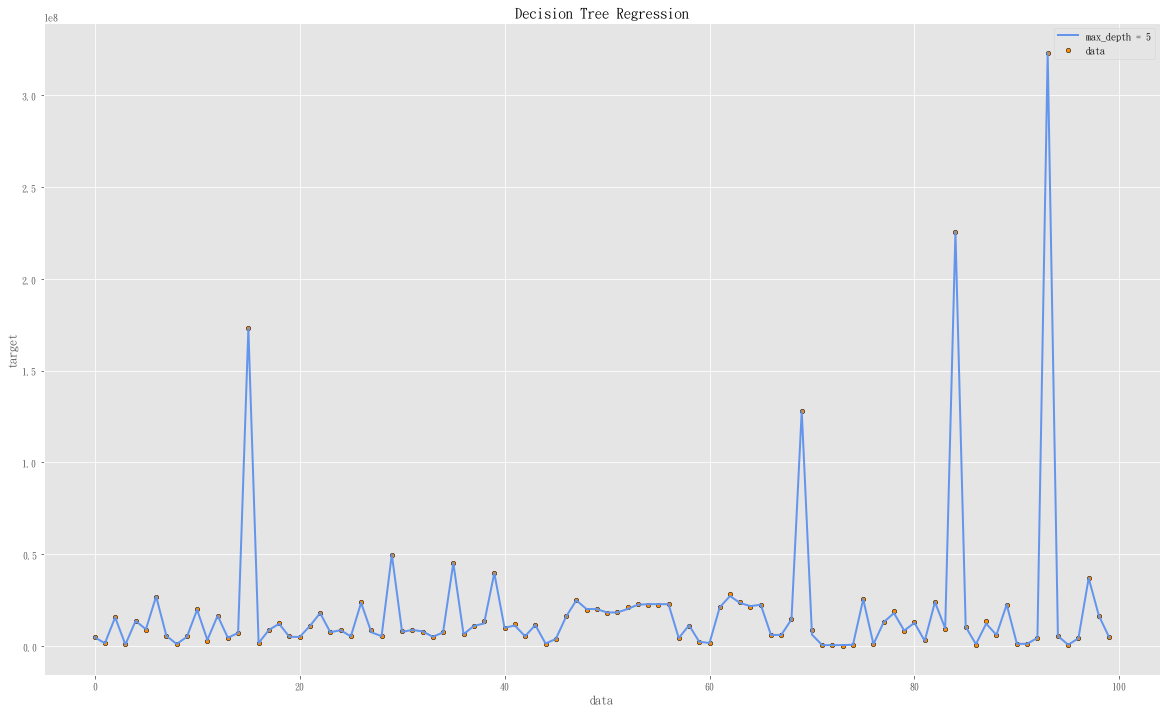

In [89]:
plt.figure(figsize = (20, 12))
plt.scatter(np.array([i for i in range(100)]), df_ml['總價元'][:100], s = 20, edgecolor = 'black', c = 'darkorange', label = 'data')
plt.plot(np.array([i for i in range(100)]), df_predict[:100], color = 'cornflowerblue', label = 'max_depth = 5', linewidth = 2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

### 計算價差比例，並找出差距比最高的(釘子戶)

In [90]:
price_gap = y.values - df_predict.values
price_gap = pd.DataFrame(price_gap, columns = ['價差'])
pd.concat([X, y, df_predict, price_gap], axis = 1).head(5)

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區,總價元,預測價格,價差
0,13.56,92.56,52398.000000,3.0,1.0,1.0,0.00,0.0,20.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4850000.0,4.815283e+06,34717.391304
1,4.38,43.40,34562.000000,2.0,0.0,2.0,0.00,0.0,24.0,105.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1500000.0,1.494298e+06,5702.380952
2,25.77,228.28,68688.000000,4.0,2.0,2.0,45.82,0.0,4.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15680000.0,1.562438e+07,55625.000000
3,0.00,33.97,29437.739182,0.0,0.0,0.0,0.00,0.0,27.0,105.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,8.021930e+05,197806.971429
4,93.50,239.04,56476.000000,12.0,1.0,12.0,0.00,0.0,7.0,105.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13500000.0,1.373188e+07,-231875.000000


In [91]:
gap_percentage = price_gap.values / y.values
gap_percentage = pd.DataFrame(gap_percentage, columns = ['差距比例'])
pd_show_all = pd.concat([X, y, df_predict, price_gap, gap_percentage], axis = 1)

In [92]:
pd_show_all.head()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區,總價元,預測價格,價差,差距比例
0,13.56,92.56,52398.000000,3.0,1.0,1.0,0.00,0.0,20.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4850000.0,4.815283e+06,34717.391304,0.007158
1,4.38,43.40,34562.000000,2.0,0.0,2.0,0.00,0.0,24.0,105.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1500000.0,1.494298e+06,5702.380952,0.003802
2,25.77,228.28,68688.000000,4.0,2.0,2.0,45.82,0.0,4.0,105.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15680000.0,1.562438e+07,55625.000000,0.003548
3,0.00,33.97,29437.739182,0.0,0.0,0.0,0.00,0.0,27.0,105.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000000.0,8.021930e+05,197806.971429,0.197807
4,93.50,239.04,56476.000000,12.0,1.0,12.0,0.00,0.0,7.0,105.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13500000.0,1.373188e+07,-231875.000000,-0.017176


In [93]:
pd_show_all['差距比例'].loc[pd_show_all['差距比例'] == np.max(pd_show_all['差距比例'])].index.values

array([37994], dtype=int64)

In [94]:
pd.DataFrame(pd_show_all.loc[pd_show_all['差距比例'].loc[pd_show_all['差距比例'] == np.max(pd_show_all['差距比例'])].index.values[0]]).T

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,土地,建物,房地(土地+建物),房地(土地+建物)+車位,車位,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區,總價元,預測價格,價差,差距比例
37994,15.67,143.78,71637.0,2.0,2.0,2.0,26.45,0.0,11.0,106.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,10300000.0,139740.495352,1.316026e+07,0.989493


## 用cross_val_predict來預測值

In [471]:
from sklearn.model_selection import cross_val_predict

In [472]:
dtr_cv = DecisionTreeRegressor(max_depth = 13)
predict = cross_val_predict(dtr_cv, X, y, cv = 10)

In [475]:
pd.concat([X, y, pd.DataFrame(predict, columns = ['預測價格'])], axis = 1).head()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區,總價元,預測價格
0,13.56,92.56,52398.0,3,1,1,0.00,0,20.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4850000,4.978239e+06
1,4.38,43.40,34562.0,2,0,2,0.00,0,24.0,105.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1500000,1.438889e+06
2,25.77,228.28,68688.0,4,2,2,45.82,0,4.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15680000,1.644949e+07
3,93.50,239.04,56476.0,12,1,12,0.00,0,7.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13500000,1.377000e+07
4,15.70,152.38,58407.0,3,2,2,29.83,0,6.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8900000,8.851059e+06


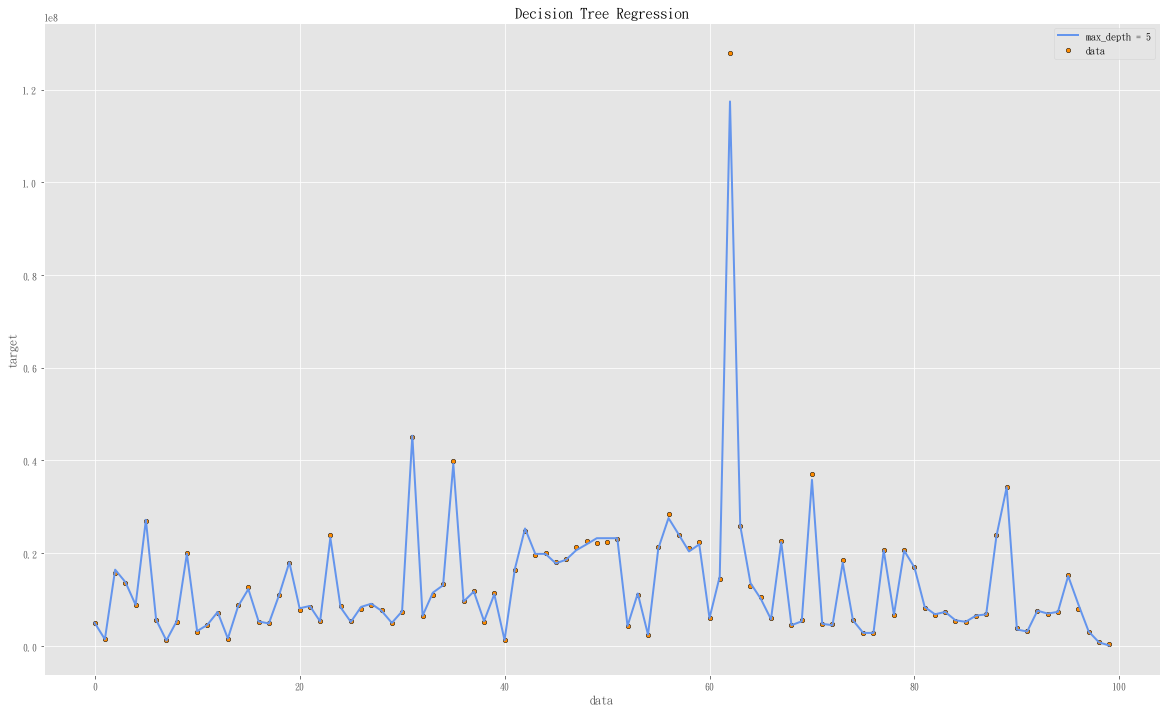

In [477]:
plt.figure(figsize = (20, 12))
plt.scatter(np.array([i for i in range(100)]), df_ml['總價元'][:100], s = 20, edgecolor = 'black', c = 'darkorange', label = 'data')
plt.plot(np.array([i for i in range(100)]), pd.DataFrame(predict, columns = ['預測價格'])[:100], color = 'cornflowerblue', label = 'max_depth = 5', linewidth = 2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

# 不拿掉純土地或車位的資料

In [124]:
df_new = pd.read_csv('Taichung_106.csv', encoding = 'utf8')
df_new.head(5)

,鄉鎮市區,交易標的,土地區段位置/建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,總樓層數,建物型態,主要用途,主要建材,建築完成年月,建物移轉總面積平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,建物現況格局-隔間,有無管理組織,總價元,單價元/平方公尺,車位類別,車位移轉總面積平方公尺,車位總價元,備註,編號
0,南區,房地(土地+建物)+車位,臺中市南區工學一街179巷1~30號,13.56,住,NaN,NaN,1050928,土地1建物1車位1,三層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,870930.0,92.56,3,1,1,有,有,4850000,52398.0,坡道機械,0.00,0,NaN,RPVNMLLJJILFFAB27CA
1,西區,房地(土地+建物),臺中市西區三民路一段39巷3弄1~30號,4.38,住,NaN,NaN,1051013,土地3建物1車位0,六層,十二層,住宅大樓(11層含以上有電梯),住家用,鋼筋混凝土造,830504.0,43.40,2,0,2,有,有,1500000,34562.0,NaN,0.00,0,NaN,RPXNMLMJJILFFAB57CA
2,南區,房地(土地+建物)+車位,臺中市南區工學北路331~360號,25.77,住,NaN,NaN,1051001,土地1建物1車位2,十一層,二十六層,住宅大樓(11層含以上有電梯),見其他登記事項,鋼筋混凝土造,1031029.0,228.28,4,2,2,有,有,15680000,68688.0,坡道平面,45.82,0,NaN,RPSNMLNJJILFFAB17CA
3,南區,車位,臺中市南區建國南路一段151~180號,0.00,NaN,NaN,NaN,1051016,土地0建物0車位1,地下層,十二層,其他,見其他登記事項,鋼筋混凝土造,801101.0,33.97,0,0,0,有,有,1000000,NaN,坡道平面,0.00,0,NaN,RPUNMLNJJILFFAB37CA
4,南區,房地(土地+建物),臺中市南區仁義街71巷1~30號,93.50,住,NaN,NaN,1050906,土地1建物1車位0,全,五層,透天厝,見其他登記事項,鋼筋混凝土造,1001116.0,239.04,12,1,12,有,無,13500000,56476.0,NaN,0.00,0,親友、員工或其他特殊關係間之交易。;畸零地或有合併使用之交易。;親友、員工或其他特殊關係間之...,RPWOMLNJJILFFAB67CA


In [125]:
for i  in range(len(df_new)):
    df_new.loc[i, '交易年'] = round(df_new.loc[i, '交易年月日'] / 10000)

In [126]:
from datetime import datetime
now = datetime.now()

In [128]:
for i in range(len(df_new)):
    df_new.loc[i, '屋齡'] = (now.year - 1911) - round(df_new.loc[i, '建築完成年月'] / 10000)

In [129]:
df_ml2 = df_new[['鄉鎮市區','土地移轉總面積平方公尺','建物移轉總面積平方公尺','單價元/平方公尺','建物現況格局-房','建物現況格局-廳','建物現況格局-衛','車位移轉總面積平方公尺','車位總價元','屋齡','交易年','總價元']]
df_ml2.groupby('鄉鎮市區').mean()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元
鄉鎮市區,,,,,,,,,,,
中區,30.478024,103.738503,45064.816667,1.747006,0.916168,1.431138,1.794686,46833.832335,30.918261,106.148204,6.515454e+06
北區,32.875711,131.346497,62645.105142,2.608553,1.384663,1.875411,9.436698,315726.973684,21.677167,105.858758,8.982820e+06
北屯區,152.469753,144.872683,62821.053636,2.646002,1.594571,1.809872,13.997712,383998.124383,12.726967,105.961599,1.457819e+07
南區,40.812173,134.743158,59247.808780,2.688889,1.603977,1.835789,14.584061,428150.643275,14.755796,105.774269,9.114153e+06
南屯區,93.027201,177.883129,79752.328832,2.741270,1.625839,1.930673,21.529193,706424.481679,11.414834,105.436264,2.022871e+07
后里區,466.479868,101.674271,35435.912214,1.860771,1.021637,1.397930,2.861825,77714.016933,11.756654,105.747883,9.607159e+06
和平區,4730.607629,1.188660,1379.876289,0.051546,0.020619,0.020619,0.000000,0.000000,14.000000,106.072165,2.222667e+06
外埔區,684.840966,96.193119,25314.464358,2.036217,1.080483,1.509054,0.091650,0.000000,15.288973,105.945674,7.604079e+06
大安區,820.370438,55.305438,16458.409594,1.291971,0.664234,0.890511,0.000000,0.003650,12.317647,106.014599,4.892644e+06


### one-hot encoding

In [130]:
df_ml2 = pd.merge(df_ml2, pd.get_dummies(df_ml2['鄉鎮市區']), left_index = True, right_index = True)
df_ml2.head()

,鄉鎮市區,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區
0,南區,13.56,92.56,52398.0,3,1,1,0.00,0,20.0,105.0,4850000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,西區,4.38,43.40,34562.0,2,0,2,0.00,0,24.0,105.0,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,南區,25.77,228.28,68688.0,4,2,2,45.82,0,4.0,105.0,15680000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,南區,0.00,33.97,NaN,0,0,0,0.00,0,27.0,105.0,1000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,南區,93.50,239.04,56476.0,12,1,12,0.00,0,7.0,105.0,13500000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
df_ml2 = df_ml2.dropna().reset_index(drop = True)
df_ml2 = df_ml2.drop(columns = ['鄉鎮市區'])
df_ml2.head(5)

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,總價元,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區
0,13.56,92.56,52398.0,3,1,1,0.00,0,20.0,105.0,4850000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.38,43.40,34562.0,2,0,2,0.00,0,24.0,105.0,1500000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,25.77,228.28,68688.0,4,2,2,45.82,0,4.0,105.0,15680000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,93.50,239.04,56476.0,12,1,12,0.00,0,7.0,105.0,13500000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,15.70,152.38,58407.0,3,2,2,29.83,0,6.0,105.0,8900000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [132]:
X = df_ml2.drop(columns = ['總價元'])
y = df_ml2[['總價元']]

## CV找最好的高度

[33773599789614.043, 25998030589792.32, 27721289241868.18, 27980234335947.523, 30389205184639.332, 31916645156862.7, 34990547184997.086, 24668660245820.055, 33842690381465.117, 32762518214424.207, 22034464699316.133, 34114936171807.023, 32714760302344.48, 22987477932410.867, 22567370034253.55, 24352909044979.508, 20104894559337.992, 22031845020147.527, 24540625189988.707, 33713401995744.117, 33521816976628.668, 20654375596655.43, 22903874496957.215, 24232662408588.684]


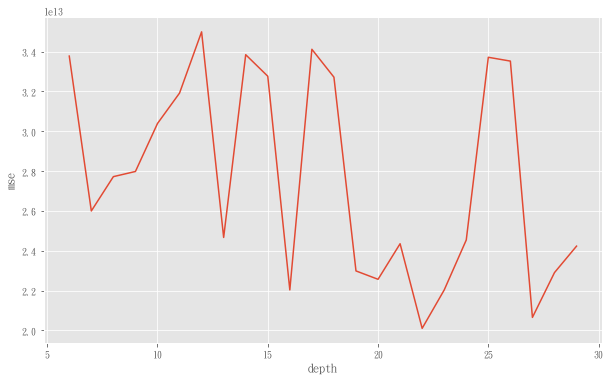

In [133]:
mse_scores = []
for d in range(6, 30):
    dtr = DecisionTreeRegressor(max_depth = d)
    mse = -cross_val_score(dtr, X, y, cv = 10, scoring = 'neg_mean_squared_error')
    mse_scores.append(mse.mean())

print(mse_scores)
plt.figure(figsize = (10, 6))
plt.plot([i for i in range(6, 30)], mse_scores)
plt.xlabel('depth')
plt.ylabel('mse')
plt.show()

In [135]:
print('smallest mse position:', mse_scores.index(min(mse_scores)) + 6)

smallest mse position: 22


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [138]:
regr = DecisionTreeRegressor(max_depth = 13)
regr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=13, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [139]:
print('score:', regr.score(X_test, y_test))

score: 0.8766369130352409


In [144]:
print(X_test.shape)

(17618, 39)


In [140]:
test_predict = regr.predict(X_test)
dif = test_predict - y_test['總價元'].values
dif_sum = 0
for difs in dif:
    dif_sum += abs(difs)
print('測試價差', dif_sum)

測試價差 8164136950.116314


In [141]:
price_predict = list(regr.predict(X))
df_predict = pd.DataFrame(price_predict, columns = ['預測價格'])
pd.concat([X, y, df_predict], axis = 1).head(5)

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元/平方公尺,建物現況格局-房,建物現況格局-廳,建物現況格局-衛,車位移轉總面積平方公尺,車位總價元,屋齡,交易年,中區,北區,北屯區,南區,南屯區,后里區,和平區,外埔區,大安區,大甲區,大肚區,大里區,大雅區,太平區,新社區,東勢區,東區,梧棲區,沙鹿區,清水區,潭子區,烏日區,石岡區,神岡區,西區,西屯區,豐原區,霧峰區,龍井區,總價元,預測價格
0,13.56,92.56,52398.0,3,1,1,0.00,0,20.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4850000,4.932292e+06
1,4.38,43.40,34562.0,2,0,2,0.00,0,24.0,105.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1500000,1.489608e+06
2,25.77,228.28,68688.0,4,2,2,45.82,0,4.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15680000,1.563000e+07
3,93.50,239.04,56476.0,12,1,12,0.00,0,7.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13500000,1.341611e+07
4,15.70,152.38,58407.0,3,2,2,29.83,0,6.0,105.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8900000,8.952895e+06


In [142]:
price_differences = y['總價元'].values - df_predict['預測價格'].values
# price_differences = price_differences.tolist()
print(price_differences[:5])
diff_sum = 0
for diff in price_differences:
    diff_sum += abs(diff)

print('總價差:', diff_sum)

[-82292.30769231  10392.15686275  50000.          83888.88888889
 -52894.73684211]
總價差: 15253842013.86561


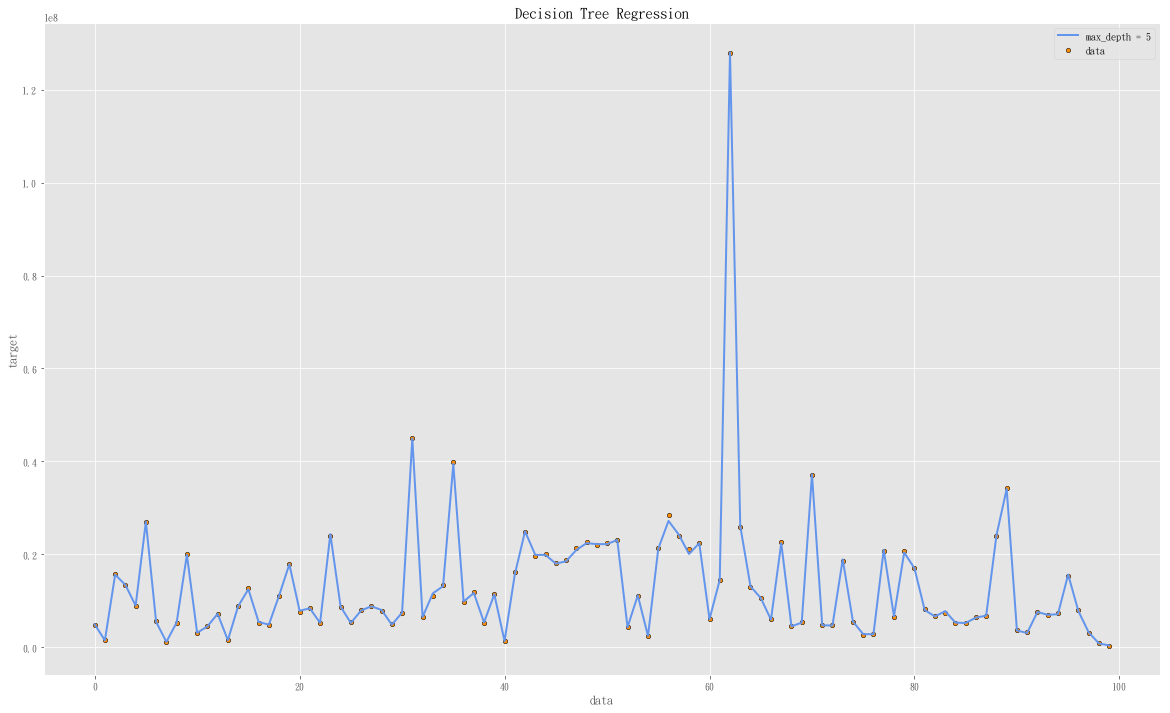

In [143]:
plt.figure(figsize = (20, 12))
plt.scatter(np.array([i for i in range(100)]), df_ml2['總價元'][:100], s = 20, edgecolor = 'black', c = 'darkorange', label = 'data')
plt.plot(np.array([i for i in range(100)]), df_predict[:100], color = 'cornflowerblue', label = 'max_depth = 5', linewidth = 2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()